# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session(user_content_storage="./content", port=55707)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
T-Mobile Visual Voicemail,TOOLS,Tools,Varies with device,3.6,41502.0,<NA>,50000000.0,Free,0.0,Everyone,"July 31, 2018",Varies with device
Easy Voice Recorder,PRODUCTIVITY,Productivity,2.4.5,4.4,205191.0,7100000.0,10000000.0,Free,0.0,Everyone,"June 20, 2018",4.1 and up
Mediatek SmartDevice,TOOLS,Tools,V1.7.6,3.6,11187.0,7300000.0,1000000.0,Free,0.0,Everyone,"March 17, 2017",4.0 and up
Ruler cm,TOOLS,Tools,2.1,3.6,661.0,809000.0,100000.0,Free,0.0,Everyone,"September 10, 2014",2.2 and up
ZArchiver Donate,TOOLS,Tools,Varies with device,4.8,1721.0,<NA>,10000.0,Paid,2.5,Everyone,"February 16, 2018",Varies with device


In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

```mermaid
erDiagram
  "playstore" {
    _ String PK "App"
    _ String PK "Category"
    nullable double "Rating"
    nullable float "Reviews"
    nullable double "Size"
    nullable float "Installs"
    _ String "Type"
    nullable double "Price"
    _ String "Content Rating"
    _ String PK "Genres"
    _ String "Last Updated"
    _ String PK "Current Ver"
    _ String "Android Ver"
  }
```


### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
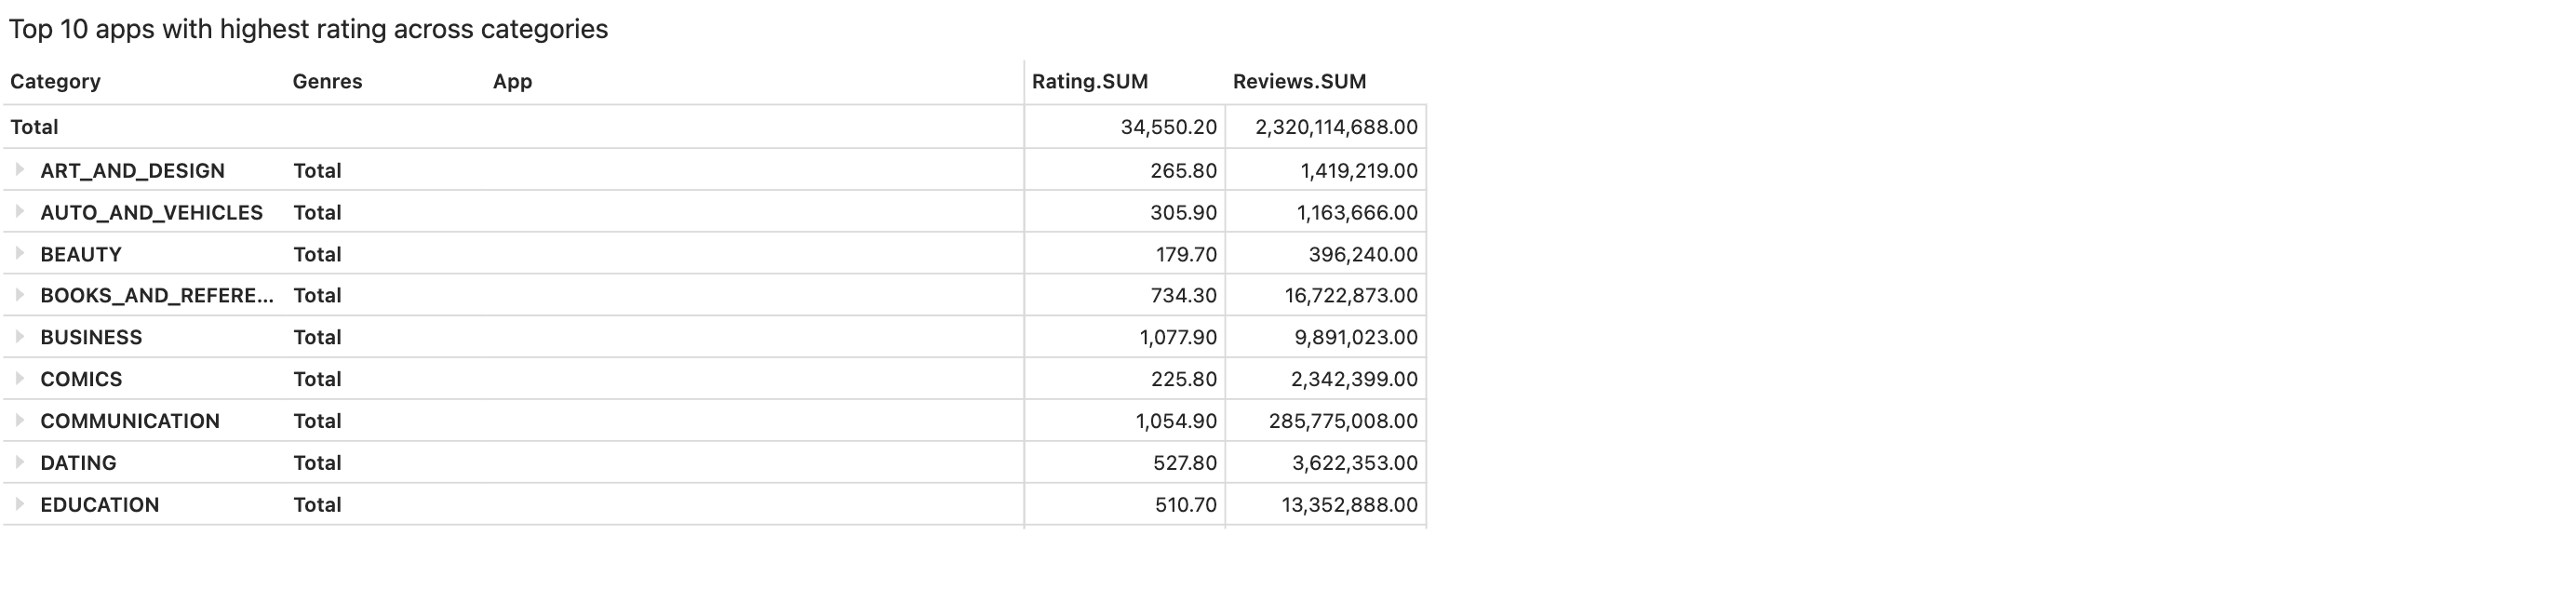

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x135d18050>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x111740cd0>, 'Size.MEAN': <atoti.measure.Measure object at 0x135d188d0>, 'Size.SUM': <atoti.measure.Measure object at 0x135d18f10>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x135d18950>, 'Reviews.SUM': <atoti.measure.Measure object at 0x135d19150>, 'Installs.MEAN': <atoti.measure.Measure object at 0x135d19190>, 'Installs.SUM': <atoti.measure.Measure object at 0x135d191d0>, 'Rating.MEAN': <atoti.measure.Measure object at 0x135d19210>, 'Rating.SUM': <atoti.measure.Measure object at 0x135d19250>, 'Price.MEAN': <atoti.measure.Measure object at 0x135d19290>, 'Price.SUM': <atoti.measure.Measure object at 0x135d192d0>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

In [7]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

In [8]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x135d2a190>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x135d1c950>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x135d1cf10>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x135d1c9d0>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x135d1c8d0>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x135d1c350>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x135d1c790>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x135d4cd50>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x135d4c990>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

In [10]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

In [11]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55707/#/dashboard/767

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>